In [5]:

import random
import pandas as pd
import math 

### Scenario 4: Probability Distribution and Utility Calculation
This implementation calculates the probability distribution for each of the dice sides, then multiplies the probabilities with its corresponding dice, and sums them up to get the corresponding utility. The algorithm then picks the one that yields the highest utility.


In [ ]:


def binomial_probability(n, k, p):
    """Calculate binomial probability of getting exactly k successes in n trials"""
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def cumulative_probability_distribution_for_dice_set(n_turns=3, rolled_dice=1, ):
    p = 1 / 6  # Probability of rolling a target value (e.g., "1")
    
    # Initialize the probability distribution for 0 to initial_dice ones
    current_distribution = [0] * (rolled_dice + 1)
    current_distribution[0] = 1.0  


    for turn in range(n_turns):
        next_distribution = [0] * (rolled_dice + 1)
        
        for current_ones in range(rolled_dice + 1):
            remaining_dice = rolled_dice - current_ones

            for new_ones in range(remaining_dice + 1):
                prob_new_ones = binomial_probability(remaining_dice, new_ones, p)
                next_distribution[current_ones + new_ones] += current_distribution[current_ones] * prob_new_ones
                
        current_distribution = next_distribution
    current_distribution = [round(prob, 4) for prob in current_distribution]

    #for ones, prob in enumerate(current_distribution):
     #   print(f"Probability of getting {ones} ones: {prob}")

    return current_distribution













[1.0, 0, 0, 0]
[0.5787, 0.3472, 0.0694, 0.0046]
[0.3349, 0.4421, 0.1945, 0.0285]
[0.1938, 0.4233, 0.3081, 0.0748]


In [135]:

class YahtzeeSection:
    def __init__(self, name, is_set, score, number):
        self.name = name
        self.is_set = is_set
        self.score = score
        self.number = number

class Game:
    def __init__(self):
        self.dice_set = [0, 0, 0, 0, 0]
        self.locked_dice = [False, False, False, False, False]
        self.sections = [
            YahtzeeSection("Ones", False, 0, 1),
            YahtzeeSection("Twos", False, 0, 2),
            YahtzeeSection("Threes", False, 0, 3),
            YahtzeeSection("Fours", False, 0, 4),
            YahtzeeSection("Fives", False, 0, 5),
            YahtzeeSection("Sixes", False, 0, 6),
        ]
        self.total_rounds = 6
        self.total_score = 0
        self.total_turns_in_a_round = 3 

    def roll_all_dice(self):
        for i in range(5):
            if self.locked_dice[i] == False:
                self.dice_set[i] = random.randint(1, 6)


    def calculate_score(self):
        for section in self.sections:
            self.total_score += section.score

    def make_decision_greedy(self, expected_utilities, turn):
        for section in self.sections:
            if section.is_set == True:
                expected_utilities[section.number - 1] = 0
        
        max_utility = max(expected_utilities)
        max_utility_index = expected_utilities.index(max_utility)
        
        return max_utility_index
       
        #print(max_utility_index + 1, "is set")


    def play_round(self):
        remaining_turns = self.total_turns_in_a_round 
        for turn in range(self.total_turns_in_a_round):
            remaining_turns = remaining_turns - turn
            
            self.roll_all_dice()
            #print("Roll", turn + 1)
          
            dice_count = []
            expected_utilities = []

            for dice_value in range(6):
                dice_count.append(self.dice_set.count(dice_value + 1))

                simulated_rolled_dice = 5 - dice_count[dice_value]
                distribution = cumulative_probability_distribution_for_dice_set(n_turns=self.total_turns_in_a_round - turn, rolled_dice=simulated_rolled_dice)
                #print(f"distribution: {distribution}")

                expected_utility = 0
                for k, prob in enumerate(distribution):
                    expected_utility += (k + dice_count[dice_value]) * prob * (dice_value + 1)

                #print(f"expected_utilities for dice value {dice_value + 1}: {expected_utilities}")
                expected_utilities.append(expected_utility)
  #          print(f"expected_utilities : {expected_utilities}")
            kept_dice = self.make_decision_greedy(expected_utilities, turn) + 1
   #         print(f"kept_dice: {kept_dice}")
            
            
            for i in range(len(self.dice_set)):
                if self.dice_set[i] == kept_dice:
                    self.locked_dice[i] = True
                else:
                    self.locked_dice[i] = False
 #           print(f"dice_set: {self.dice_set}")
#            print(f"locked_dice", self.locked_dice)

        products = []
        for i in range (6):
          
            prod = dice_count[i] * (i + 1)
            if self.sections[i].is_set == True:
                prod = 0
            products.append(prod) 


         

        maximum = max(products)
        maximum_index = products.index(maximum)
        #print(f"products" , products)
        #print(f"maximum", maximum)
        self.sections[maximum_index].is_set = True
        self.sections[maximum_index].score = maximum
     


    def play_game(self):
        for i in range(self.total_rounds):
            self.play_round()
        self.calculate_score()
       # print("Total Score:", self.total_score)

            

In [138]:


# Simulation
num_simulations = 40000
total_scores = []

for _ in range(num_simulations):
    game = Game()
    game.play_game()
    total_scores.append(game.total_score)
    

# Analyze results
average_score = sum(total_scores) / num_simulations
print(f"Average score over {num_simulations} games: {average_score}")

for section in game.sections:
    print(f"{section.name}: {section.score}")


Average score over 40000 games: 49.459075
Ones: 1
Twos: 4
Threes: 3
Fours: 8
Fives: 10
Sixes: 12


Average score over 40000 games: 49.403975


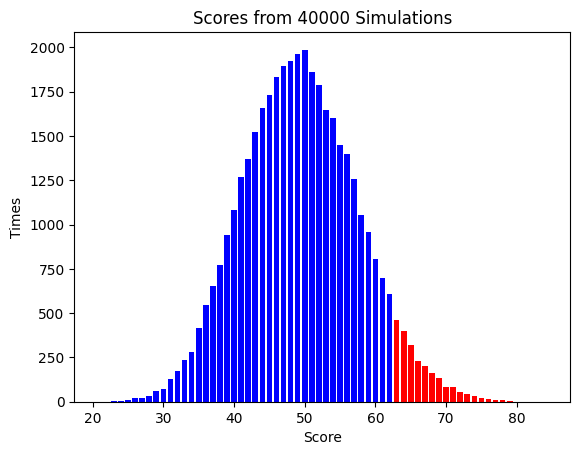

Ones: 1
Twos: 4
Threes: 6
Fours: 12
Fives: 20
Sixes: 18


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Simulation
num_simulations = 40000
total_scores = []

for _ in range(num_simulations):
    game = Game()
    game.play_game()
    total_scores.append(game.total_score)

# Analyze results
average_score = sum(total_scores) / num_simulations
print(f"Average score over {num_simulations} games: {average_score}")

# Count the frequency of each score
score_counts = Counter(total_scores)

# Prepare data for plotting
scores = list(score_counts.keys())
frequencies = list(score_counts.values())
colors = ['red' if score >= 63 else 'blue' for score in scores]

# Plot the scores
plt.bar(scores, frequencies, color=colors)
plt.xlabel('Score')
plt.ylabel('Times')
plt.title(f'Scores from {num_simulations} Simulations')
plt.show()

